In [1]:
import os
from google.cloud import bigquery
import pandas as pd


# ***I commented the following imports out but you will likely need at least some of them at some point***
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy
# from scipy.stats import norm


# dont forget to replace <andreasfreund> with your local username
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\Users\\91952\\AppData\\Roaming\\gcloud\\application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1 Fiber/DSL/Cable Deployment Rate Change over Years (cont.)

In [3]:
fiber="""
SELECT *
FROM `broadband-data.StateInfo.Fiber_Deployment_Change` 
ORDER BY FiberDeploymentRate_2021 DESC
"""
dsl="""
SELECT *
FROM `broadband-data.StateInfo.DSL_Deployment_Change` 
ORDER BY DSLDeploymentRate_2021 DESC
"""

cable="""
SELECT *
FROM `broadband-data.StateInfo.Cable_Deployment_Change` 
ORDER BY CableDeploymentRate_2021 DESC
"""

fiberdf = client.query(fiber).to_dataframe()
dsldf = client.query(dsl).to_dataframe()
cabledf = client.query(cable).to_dataframe()

In [4]:
state_num = len(fiberdf)
Type = ['Fiber'] * state_num
new_fiberdf = fiberdf[['StateCode', 'State_Name', 'FiberDeploymentRate_2021']]
new_fiberdf['Type'] = Type
new_fiberdf.rename(columns={'FiberDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)

Type = ['DSL'] * state_num
new_dsldf = dsldf[['StateCode', 'State_Name', 'DSLDeploymentRate_2021']]
new_dsldf['Type'] = Type
new_dsldf.rename(columns={'DSLDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)

Type = ['Cable'] * state_num
new_cabledf = cabledf[['StateCode', 'State_Name', 'CableDeploymentRate_2021']]
new_cabledf['Type'] = Type
new_cabledf.rename(columns={'CableDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)

alltypedf = pd.concat([new_fiberdf, new_dsldf, new_cabledf])

C:\Users\91952\AppData\Local\Temp\ipykernel_24476\307720239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fiberdf['Type'] = Type
C:\Users\91952\AppData\Local\Temp\ipykernel_24476\307720239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fiberdf.rename(columns={'FiberDeploymentRate_2021': 'DeploymentRate_2021'}, inplace=True)
C:\Users\91952\AppData\Local\Temp\ipykernel_24476\307720239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [5]:
def _deployment_rate_change(state, techtype):
    if techtype == "Fiber":
        df = fiberdf
    elif techtype == 'DSL':
        df = dsldf
    else:
        df = cabledf
    
    cols = []
    for year in range(2015, 2022):
        col = techtype + "DeploymentRate_" + str(year)
        cols.append(col)
    
    df = df.loc[df['State_Name'] == state, cols]
    
    return df.to_numpy()

def deployment_rate_change(state):
    tech = ["Fiber", "DSL", "Cable"]
    rates = np.zeros((3, 7))
    
    for i in range(3):
        rates[i] = _deployment_rate_change(state, tech[i])
    
    return rates

def plot_deployment_rate_change(state):
    rates = deployment_rate_change(state)
    years = np.arange(2015, 2022)
    
    plt.figure(figsize=(5, 5))
    plt.plot(years, rates[0], 'b-', label='Fiber')
    plt.plot(years, rates[1], 'r-', label='DSL')
    plt.plot(years, rates[2], 'g-', label='Cable')
    plt.plot(years, rates[0], 'b.')
    plt.plot(years, rates[1], 'r.')
    plt.plot(years, rates[2], 'g.')
    plt.xlabel('Years')
    plt.ylabel('Deployment Rate')
    plt.title("Deployment Rate of All Type in " + state)
    plt.legend()
    plt.show()

The depolyment rate is calculated by dividing the number of blocks which deployed with specific Broadband technology with the total number of blocks in one state.

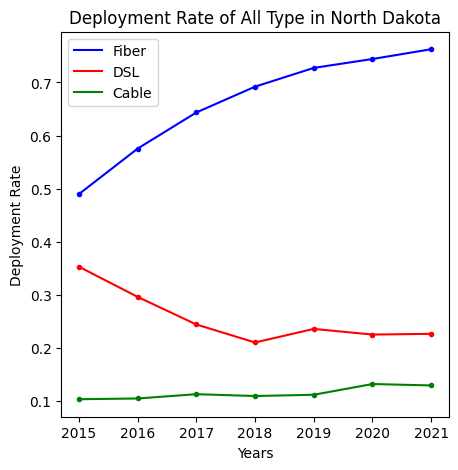

In [6]:
plot_deployment_rate_change("North Dakota")

# 2 Analysis of Provider in 2021 (North Dakota as example)

First let's find out how many and who are the providers in **North Dakota** provide costomer Broadband service.

In [8]:
q_provider_in_2021 = """
SELECT DISTINCT Provider_Id, ProviderName
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2021_v1` 
where StateAbbr = 'ND' and Consumer = 1
"""

provider_in_2021 = client.query(q_provider_in_2021).to_dataframe()
provider_in_2021

,Provider_Id,ProviderName
0,76903,Consolidated Telcom
1,76906,"Consolidated Communications Networks, Inc."
2,77966,VAL-ED Joint Venture LLP dba 702Communications
3,78502,"SRT Communications, Inc."
4,78023,"Cable Services, inc."
5,79031,West River Telecommunications Cooperative
6,77377,Dickey Rural Telephone Cooperative
7,79030,West River Cooperative Telephone Company
8,78294,Daktel Communications LLC
9,78298,Dakota Central Telecommunications Cooperative


In [68]:
q_provider_in_2021 = """
WITH ND_block_2021 AS (
SELECT DISTINCT Provider_Id, ProviderName, CAST(BlockCode AS STRING) AS BlockCode, TechCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and Consumer = 1)

SELECT Provider_Id, ProviderName,
       COUNT(*)/133769 AS BlockDeploymentRateWithService
FROM ND_block_2021
GROUP BY Provider_Id, ProviderName
ORDER BY BlockDeploymentRateWithService DESC
"""

provider_in_2021 = client.query(q_provider_in_2021).to_dataframe()

Now let's see for each provider what is the service deployment rate in **ND**.

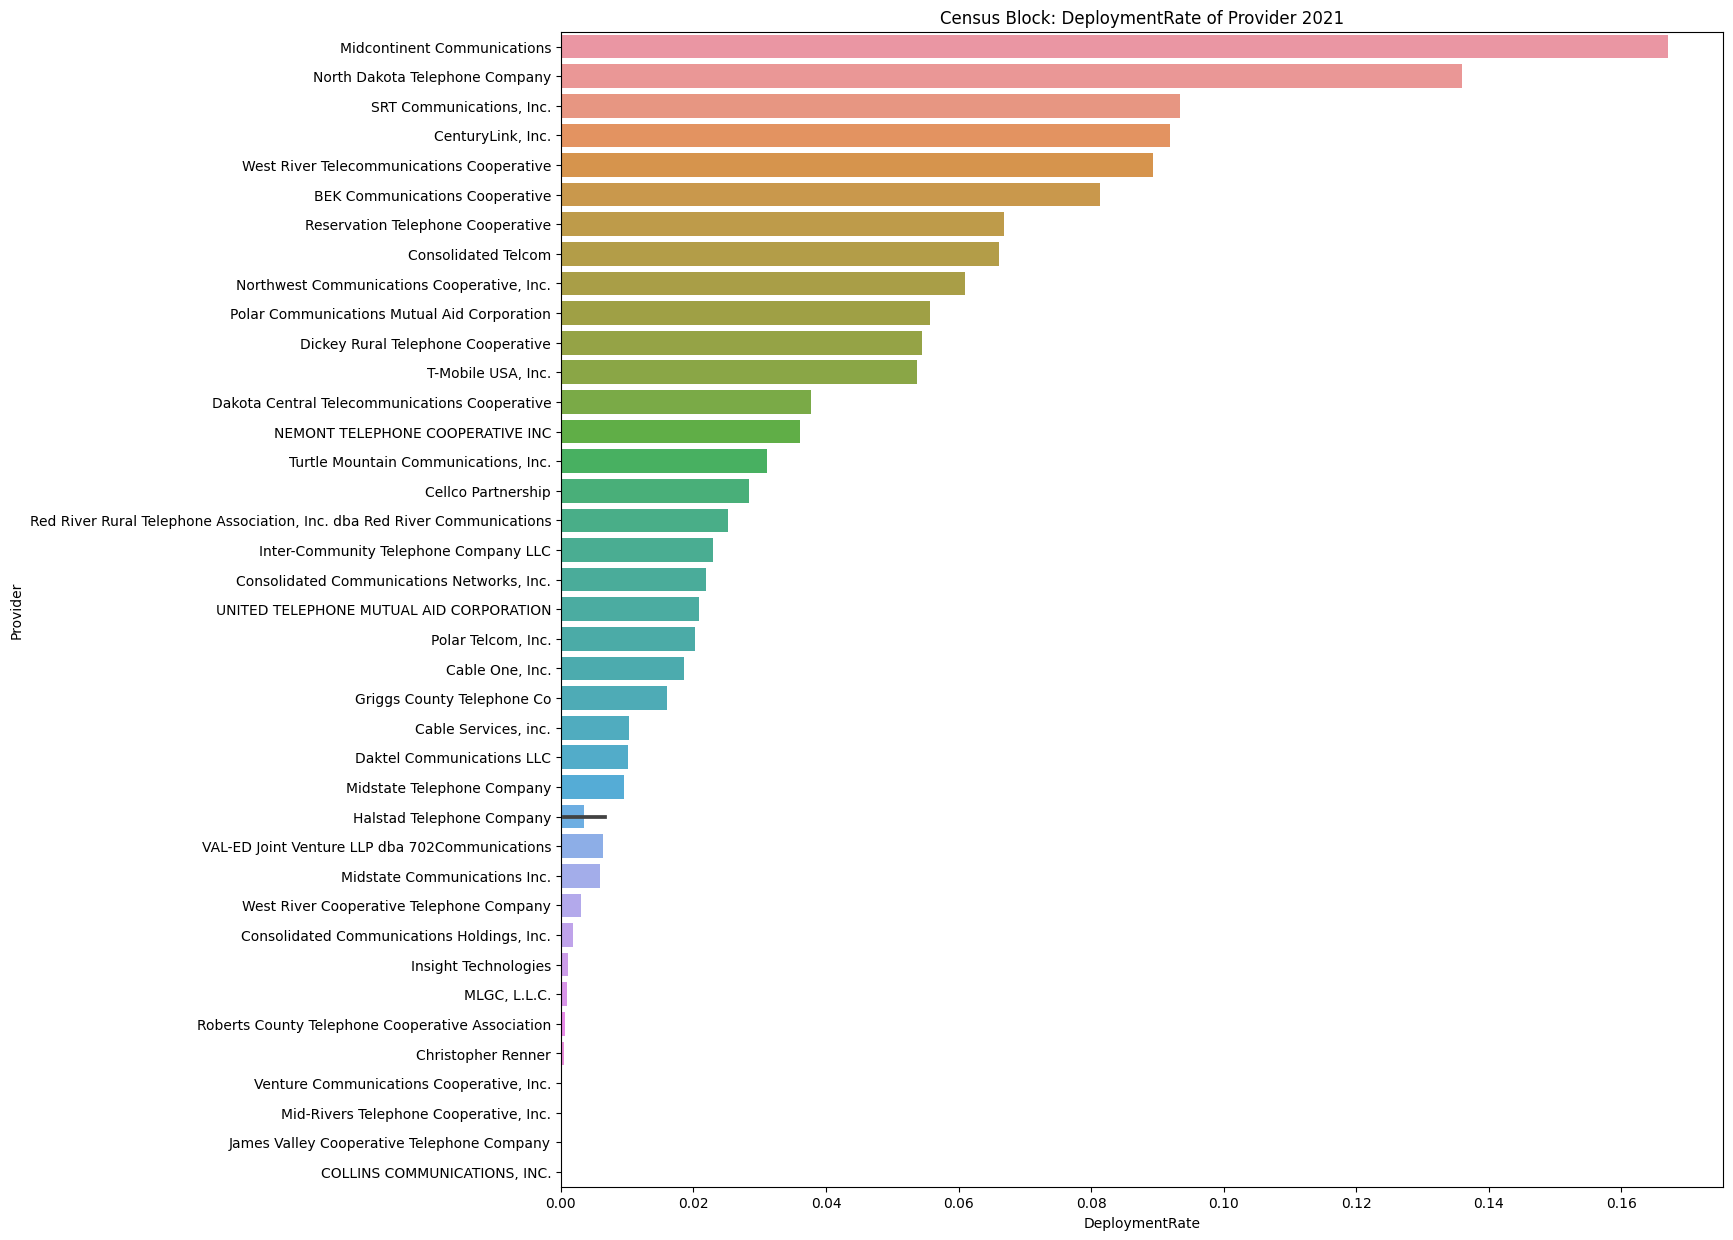

In [15]:
plt.figure(figsize=(15,15))
sns.barplot(y='ProviderName',x='BlockDeploymentRateWithService',data=provider_in_2021, orient='h')
plt.ylabel('Provider')
plt.xlabel('DeploymentRate')
plt.title('Census Block: DeploymentRate of Provider 2021')
plt.show()

In [69]:
q_cable_provider_in_2021 = """
WITH ND_block_2021 AS (
SELECT DISTINCT Provider_Id, ProviderName, CAST(BlockCode AS STRING) AS BlockCode, TechCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and TechCode in (40, 41, 42, 43) and Consumer = 1)

SELECT Provider_Id, ProviderName,
       COUNT(*)/133769 AS BlockDeploymentRateWithCable
FROM ND_block_2021
GROUP BY Provider_Id, ProviderName
ORDER BY BlockDeploymentRateWithCable DESC
"""

cable_provider_in_2021 = client.query(q_cable_provider_in_2021).to_dataframe()

q_dsl_provider_in_2021 = """
WITH ND_block_2021 AS (
SELECT DISTINCT Provider_Id, ProviderName, CAST(BlockCode AS STRING) AS BlockCode, TechCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and TechCode in (10, 11, 12, 20) and Consumer = 1)

SELECT Provider_Id, ProviderName,
       COUNT(*)/133769 AS BlockDeploymentRateWithDSL
FROM ND_block_2021
GROUP BY Provider_Id, ProviderName
ORDER BY BlockDeploymentRateWithDSL DESC
"""

dsl_provider_in_2021 = client.query(q_dsl_provider_in_2021).to_dataframe()

q_fiber_provider_in_2021 = """
WITH ND_block_2021 AS (
SELECT DISTINCT Provider_Id, ProviderName, CAST(BlockCode AS STRING) AS BlockCode, TechCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and TechCode = 50 and Consumer = 1)

SELECT Provider_Id, ProviderName,
       COUNT(*)/133769 AS BlockDeploymentRateWithFiber
FROM ND_block_2021
GROUP BY Provider_Id, ProviderName
ORDER BY BlockDeploymentRateWithFiber DESC
"""

fiber_provider_in_2021 = client.query(q_fiber_provider_in_2021).to_dataframe()

In [70]:
np.sum(fiber_provider_in_2021['BlockDeploymentRateWithFiber'])

0.5173171661595737

In [71]:
provider_num = len(provider_in_2021)
Type = ['All'] * provider_num
new_alldf = provider_in_2021[['Provider_Id', 'ProviderName', 'BlockDeploymentRateWithService']]
new_alldf['Type'] = Type
new_alldf.rename(columns={'BlockDeploymentRateWithService': 'DeploymentRate_2021'}, inplace=True)

provider_num = len(fiber_provider_in_2021)
Type = ['Fiber'] * provider_num
new_fiberdf = fiber_provider_in_2021[['Provider_Id', 'ProviderName', 'BlockDeploymentRateWithFiber']]
new_fiberdf['Type'] = Type
new_fiberdf.rename(columns={'BlockDeploymentRateWithFiber': 'DeploymentRate_2021'}, inplace=True)

provider_num = len(dsl_provider_in_2021)
Type = ['DSL'] * provider_num
new_dsldf = dsl_provider_in_2021[['Provider_Id', 'ProviderName', 'BlockDeploymentRateWithDSL']]
new_dsldf['Type'] = Type
new_dsldf.rename(columns={'BlockDeploymentRateWithDSL': 'DeploymentRate_2021'}, inplace=True)

provider_num = len(cable_provider_in_2021)
Type = ['Cable'] * provider_num
new_cabledf = cable_provider_in_2021[['Provider_Id', 'ProviderName', 'BlockDeploymentRateWithCable']]
new_cabledf['Type'] = Type
new_cabledf.rename(columns={'BlockDeploymentRateWithCable': 'DeploymentRate_2021'}, inplace=True)

alltypedf = pd.concat([new_alldf, new_fiberdf, new_dsldf, new_cabledf])

Now let's find out what kind of technology each provider uses.

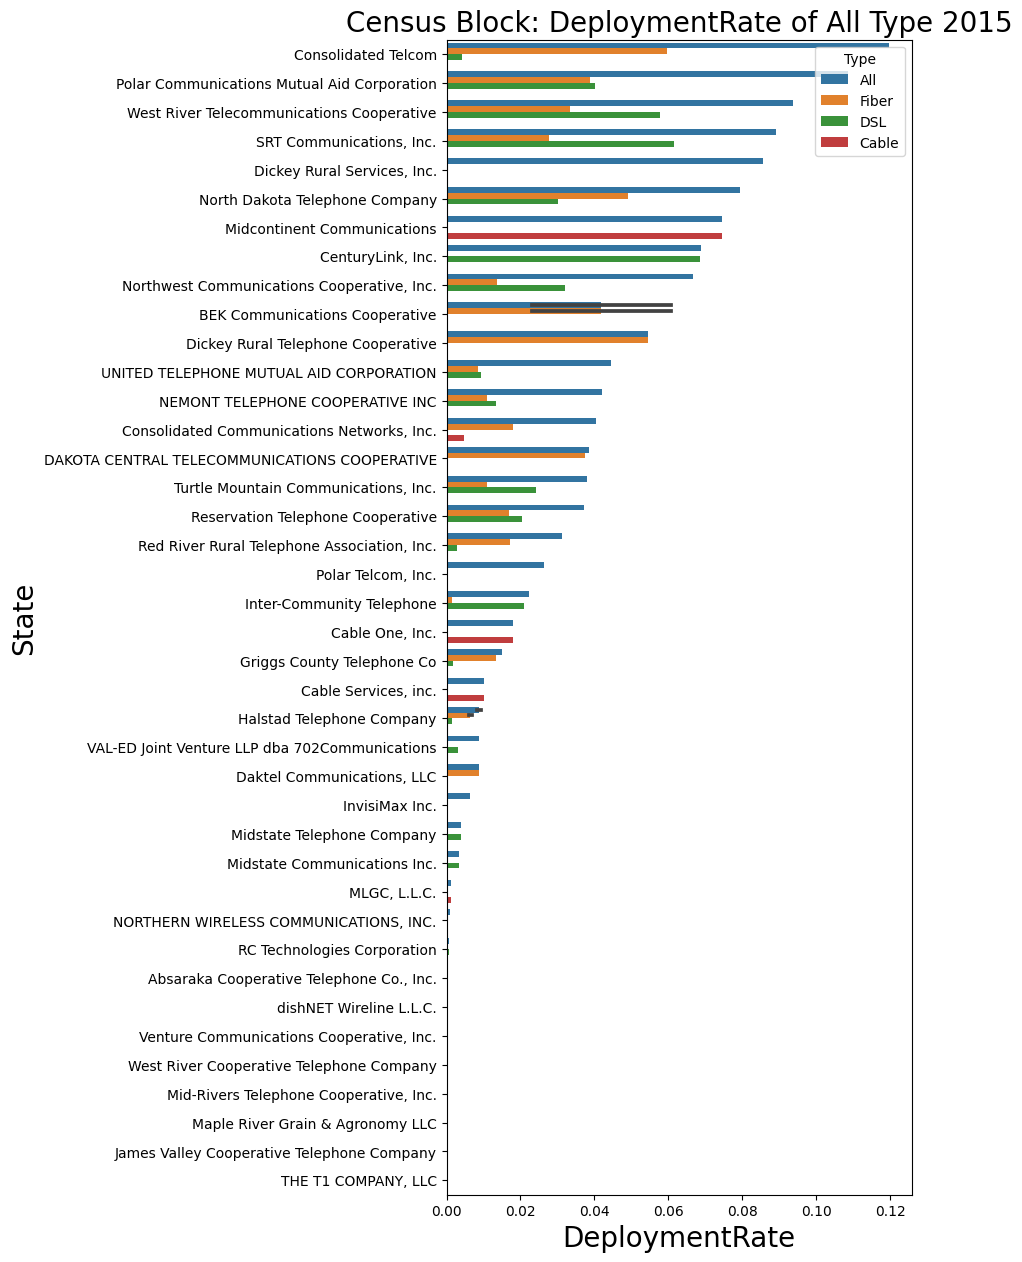

In [72]:
plt.figure(figsize=(6,15))
sns.barplot(y='ProviderName',x='DeploymentRate_2021', hue='Type', data=alltypedf, orient='h')
plt.xticks()
plt.ylabel('State',fontsize=20)
plt.xlabel('DeploymentRate',fontsize=20)
plt.title('Census Block: DeploymentRate of All Type 2015',fontsize=20)
plt.show()

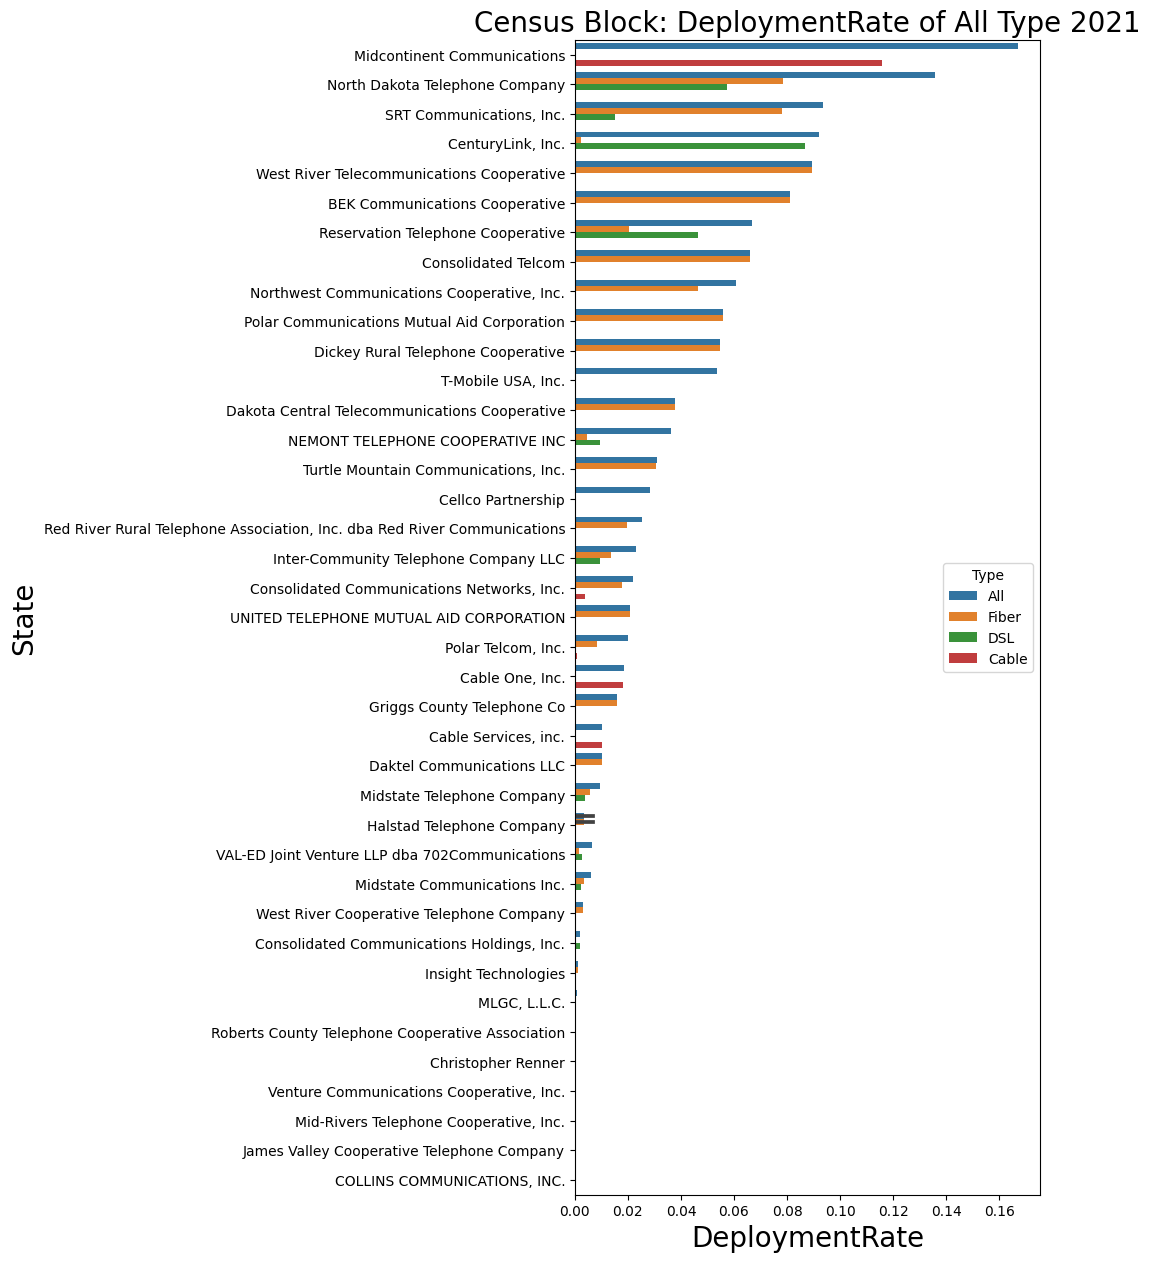

In [32]:
plt.figure(figsize=(6,15))
sns.barplot(y='ProviderName',x='DeploymentRate_2021', hue='Type', data=alltypedf, orient='h')
plt.xticks()
plt.ylabel('State',fontsize=20)
plt.xlabel('DeploymentRate',fontsize=20)
plt.title('Census Block: DeploymentRate of All Type 2021',fontsize=20)
plt.show()

# 3 Providers Change over Years (North Dakota as example)

In [34]:
providers = """
WITH ND_2021 AS (
SELECT DISTINCT ProviderName, 1 AS Y2021
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2021_v1` 
where StateAbbr = 'ND' and Consumer = 1),

ND_2020 AS (
SELECT DISTINCT ProviderName, 1 AS Y2020
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2020_v1` 
where StateAbbr = 'ND' and Consumer = 1),

ND_2019 AS (
SELECT DISTINCT ProviderName, 1 AS Y2019
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2019_v2` 
where StateAbbr = 'ND' and Consumer = 1),

ND_2018 AS (
SELECT DISTINCT ProviderName, 1 AS Y2018
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2018_v1` 
where StateAbbr = 'ND' and Consumer = 1),

ND_2017 AS (
SELECT DISTINCT ProviderName, 1 AS Y2017
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2017_v3` 
where StateAbbr = 'ND' and Consumer = 1),

ND_2016 AS (
SELECT DISTINCT ProviderName, 1 AS Y2016
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2016_v4` 
where StateAbbr = 'ND' and Consumer = 1),

ND_2015 AS (
SELECT DISTINCT ProviderName, 1 AS Y2015
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and Consumer = 1)

SELECT *
FROM ND_2015
FULL JOIN ND_2016 USING (ProviderName)
FULL JOIN ND_2017 USING (ProviderName)
FULL JOIN ND_2018 USING (ProviderName)
FULL JOIN ND_2019 USING (ProviderName)
FULL JOIN ND_2020 USING (ProviderName)
FULL JOIN ND_2021 USING (ProviderName)
ORDER BY ProviderName
"""

providers = client.query(providers).to_dataframe()

We could create a table to show the change of providers over years in **ND**.

In [39]:
pd.set_option('display.max_rows', None)
providers.head(100)

,ProviderName,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,"Absaraka Cooperative Telephone Co., Inc.",1,1,1,1,1,<NA>,<NA>
1,BEK Communications Cooperative,1,1,1,1,1,1,1
2,"COLLINS COMMUNICATIONS, INC.",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
3,"Cable One, Inc.",1,1,1,1,1,1,1
4,"Cable Services, inc.",1,1,1,1,1,1,1
5,Cass Clay Wireless,<NA>,<NA>,<NA>,<NA>,<NA>,1,<NA>
6,Cellco Partnership,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
7,"CenturyLink, Inc.",1,1,1,1,1,1,1
8,Christopher Renner,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
9,Consolidated,<NA>,<NA>,<NA>,<NA>,<NA>,1,<NA>


In [62]:
provider_fiber = """
WITH State_2021 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2021_v1` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2021 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2021
GROUP BY StateCode),

State_2020 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2020_v1` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2020 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2020
GROUP BY StateCode),

State_2019 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2019_v2` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2019 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2019
GROUP BY StateCode),

State_2018 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2018_v1` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2018 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2018
GROUP BY StateCode),

State_2017 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2017_v3` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2017 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2017
GROUP BY StateCode),

State_2016 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2016_v4` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2016 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2016
GROUP BY StateCode),

State_2015 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode = 50 and Consumer = 1),

Cable_2015 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2015
GROUP BY StateCode)

SELECT Cable_2021.StateCode, 
       SBC.State_Name, 
       Cable_2015.BlockNumberWithCable AS BlockNumberWithCable_2015, 
       Cable_2016.BlockNumberWithCable AS BlockNumberWithCable_2016, 
       Cable_2017.BlockNumberWithCable AS BlockNumberWithCable_2017, 
       Cable_2018.BlockNumberWithCable AS BlockNumberWithCable_2018, 
       Cable_2019.BlockNumberWithCable AS BlockNumberWithCable_2019, 
       Cable_2020.BlockNumberWithCable AS BlockNumberWithCable_2020, 
       Cable_2021.BlockNumberWithCable AS BlockNumberWithCable_2021, 
       SBC.Number_of_2010_Census_Blocks,
       Cable_2015.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2015,
       Cable_2016.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2016,
       Cable_2017.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2017,
       Cable_2018.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2018,
       Cable_2019.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2019,
       Cable_2020.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2020,
       Cable_2021.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2021
FROM Cable_2021
JOIN Cable_2020 ON Cable_2021.StateCode = Cable_2020.StateCode
JOIN Cable_2019 ON Cable_2021.StateCode = Cable_2019.StateCode
JOIN Cable_2018 ON Cable_2021.StateCode = Cable_2018.StateCode
JOIN Cable_2017 ON Cable_2021.StateCode = Cable_2017.StateCode
JOIN Cable_2016 ON Cable_2021.StateCode = Cable_2016.StateCode
JOIN Cable_2015 ON Cable_2021.StateCode = Cable_2015.StateCode
JOIN `broadband-data.fcc_form_477.State_Block_Counts_2010_2020` AS SBC
ON Cable_2021.StateCode = LPAD(CAST(SBC.State_Code AS STRING), 2, '0')
ORDER BY Cable_2021.StateCode
"""

provider_fiber = client.query(provider_fiber).to_dataframe()

In [63]:
provider_dsl = """
WITH State_2021 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2021_v1` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2021 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2021
GROUP BY StateCode),

State_2020 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2020_v1` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2020 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2020
GROUP BY StateCode),

State_2019 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2019_v2` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2019 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2019
GROUP BY StateCode),

State_2018 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2018_v1` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2018 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2018
GROUP BY StateCode),

State_2017 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2017_v3` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2017 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2017
GROUP BY StateCode),

State_2016 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2016_v4` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2016 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2016
GROUP BY StateCode),

State_2015 AS (
SELECT DISTINCT SUBSTR(LPAD(CAST(BlockCode AS STRING), 15, '0'), 1, 2) AS StateCode,
                CAST(BlockCode AS STRING) AS BlockCode
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5` 
where StateAbbr = 'ND' and ProviderName = 'Reservation Telephone Cooperative' and TechCode in (10, 11, 12, 20) and Consumer = 1),

Cable_2015 AS (
SELECT StateCode,
       COUNT(*) AS BlockNumberWithCable
FROM State_2015
GROUP BY StateCode)

SELECT Cable_2021.StateCode, 
       SBC.State_Name, 
       Cable_2015.BlockNumberWithCable AS BlockNumberWithCable_2015, 
       Cable_2016.BlockNumberWithCable AS BlockNumberWithCable_2016, 
       Cable_2017.BlockNumberWithCable AS BlockNumberWithCable_2017, 
       Cable_2018.BlockNumberWithCable AS BlockNumberWithCable_2018, 
       Cable_2019.BlockNumberWithCable AS BlockNumberWithCable_2019, 
       Cable_2020.BlockNumberWithCable AS BlockNumberWithCable_2020, 
       Cable_2021.BlockNumberWithCable AS BlockNumberWithCable_2021, 
       SBC.Number_of_2010_Census_Blocks,
       Cable_2015.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2015,
       Cable_2016.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2016,
       Cable_2017.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2017,
       Cable_2018.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2018,
       Cable_2019.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2019,
       Cable_2020.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2020,
       Cable_2021.BlockNumberWithCable / SBC.Number_of_2010_Census_Blocks AS CableDeploymentRate_2021
FROM Cable_2021
JOIN Cable_2020 ON Cable_2021.StateCode = Cable_2020.StateCode
JOIN Cable_2019 ON Cable_2021.StateCode = Cable_2019.StateCode
JOIN Cable_2018 ON Cable_2021.StateCode = Cable_2018.StateCode
JOIN Cable_2017 ON Cable_2021.StateCode = Cable_2017.StateCode
JOIN Cable_2016 ON Cable_2021.StateCode = Cable_2016.StateCode
JOIN Cable_2015 ON Cable_2021.StateCode = Cable_2015.StateCode
JOIN `broadband-data.fcc_form_477.State_Block_Counts_2010_2020` AS SBC
ON Cable_2021.StateCode = LPAD(CAST(SBC.State_Code AS STRING), 2, '0')
ORDER BY Cable_2021.StateCode
"""

provider_dsl = client.query(provider_dsl).to_dataframe()

In [64]:
provider_fiber

,StateCode,State_Name,BlockNumberWithCable_2015,BlockNumberWithCable_2016,BlockNumberWithCable_2017,BlockNumberWithCable_2018,BlockNumberWithCable_2019,BlockNumberWithCable_2020,BlockNumberWithCable_2021,Number_of_2010_Census_Blocks,CableDeploymentRate_2015,CableDeploymentRate_2016,CableDeploymentRate_2017,CableDeploymentRate_2018,CableDeploymentRate_2019,CableDeploymentRate_2020,CableDeploymentRate_2021
0,38,North Dakota,2264,2263,2698,2727,2739,2785,2712,133769,0.016925,0.016917,0.020169,0.020386,0.020476,0.020819,0.020274


In [65]:
provider_dsl

,StateCode,State_Name,BlockNumberWithCable_2015,BlockNumberWithCable_2016,BlockNumberWithCable_2017,BlockNumberWithCable_2018,BlockNumberWithCable_2019,BlockNumberWithCable_2020,BlockNumberWithCable_2021,Number_of_2010_Census_Blocks,CableDeploymentRate_2015,CableDeploymentRate_2016,CableDeploymentRate_2017,CableDeploymentRate_2018,CableDeploymentRate_2019,CableDeploymentRate_2020,CableDeploymentRate_2021
0,38,North Dakota,2713,2711,2751,2756,1346,1350,6220,133769,0.020281,0.020266,0.020565,0.020603,0.010062,0.010092,0.046498


In [55]:
def _deployment_rate_change(techtype):
    if techtype == "Fiber":
        df = provider_fiber
    elif techtype == 'DSL':
        df = provider_dsl
    else:
        df = cabledf
    
    cols = []
    for year in range(2015, 2022):
        col = "Cable" + "DeploymentRate_" + str(year)
        cols.append(col)
    
    df = df.loc[:, cols]
    
    return df.to_numpy()

def deployment_rate_change():
    tech = ["Fiber", "DSL"]
    rates = np.zeros((2, 7))
    
    for i in range(2):
        rates[i] = _deployment_rate_change(tech[i])
    
    return rates

def plot_deployment_rate_change(provider):
    rates = deployment_rate_change()
    years = np.arange(2015, 2022)
    
    plt.figure(figsize=(5, 5))
    plt.plot(years, rates[0], 'b-', label='Fiber')
    plt.plot(years, rates[1], 'r-', label='DSL')
    plt.plot(years, rates[0], 'b.')
    plt.plot(years, rates[1], 'r.')
    plt.xlabel('Years')
    plt.ylabel('Deployment Rate')
    plt.title("Deployment Rate of All Type in " + provider)
    plt.legend()
    plt.show()

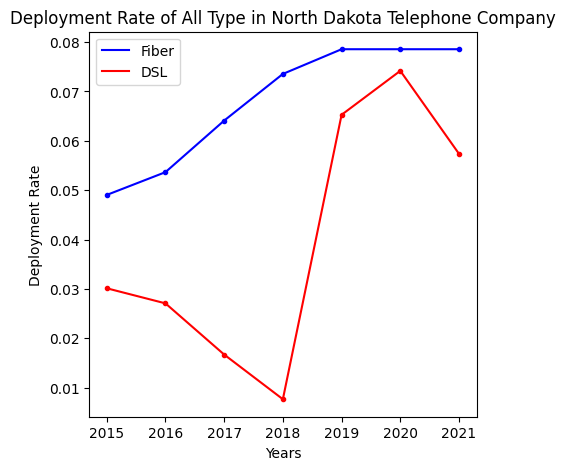

In [50]:
plot_deployment_rate_change()

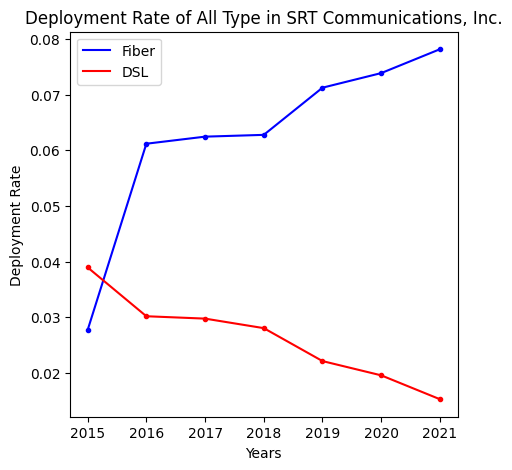

In [56]:
plot_deployment_rate_change('SRT Communications, Inc.')

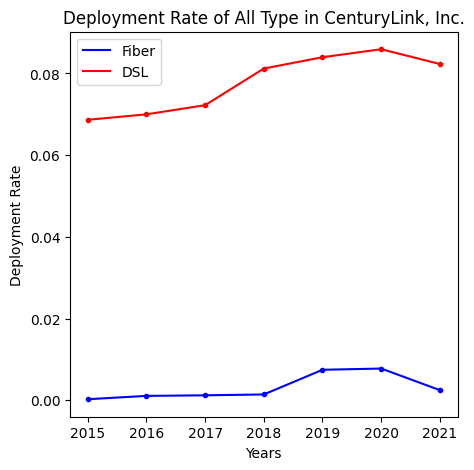

In [61]:
plot_deployment_rate_change('CenturyLink, Inc.')

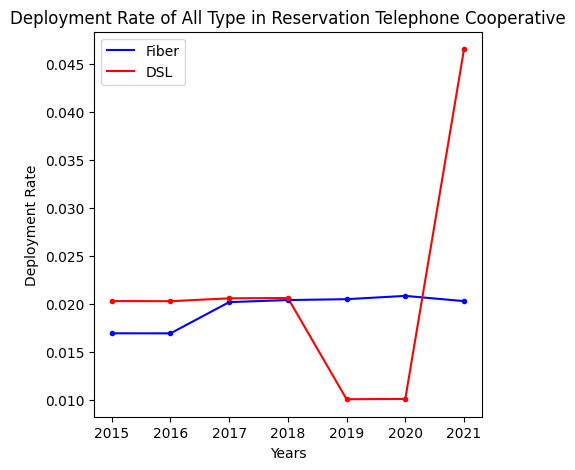

In [67]:
plot_deployment_rate_change('Reservation Telephone Cooperative')